数据样例：
   Year NOC  Sport  Medals  Host
0  1896  13     10       3     1
1  1896  14     15       5     1
2  1896  56     17       6     1
3  1896  71     17      11     1
4  1896  76     17       9     1

回归结果: 奖牌 = 12.44 + 0.00 * Host
东道主效应系数 (β1): 0.00

修正前后奖牌数据对比：
   Year NOC  Medals  Corrected_Medals  Host
0  1896  13       3               3.0     1
1  1896  14       5               5.0     1
2  1896  56       6               6.0     1
3  1896  71      11              11.0     1
4  1896  76       9               9.0     1


/SSD_DISK/users/yaoyuxuan/anaconda3/envs/gaussian_splatting/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22870 (\N{CJK UNIFIED IDEOGRAPH-5956}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/SSD_DISK/users/yaoyuxuan/anaconda3/envs/gaussian_splatting/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29260 (\N{CJK UNIFIED IDEOGRAPH-724C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/SSD_DISK/users/yaoyuxuan/anaconda3/envs/gaussian_splatting/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/SSD_DISK/users/yaoyuxuan/anaconda3/envs/gaussian_splatting/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/SSD_DISK/us

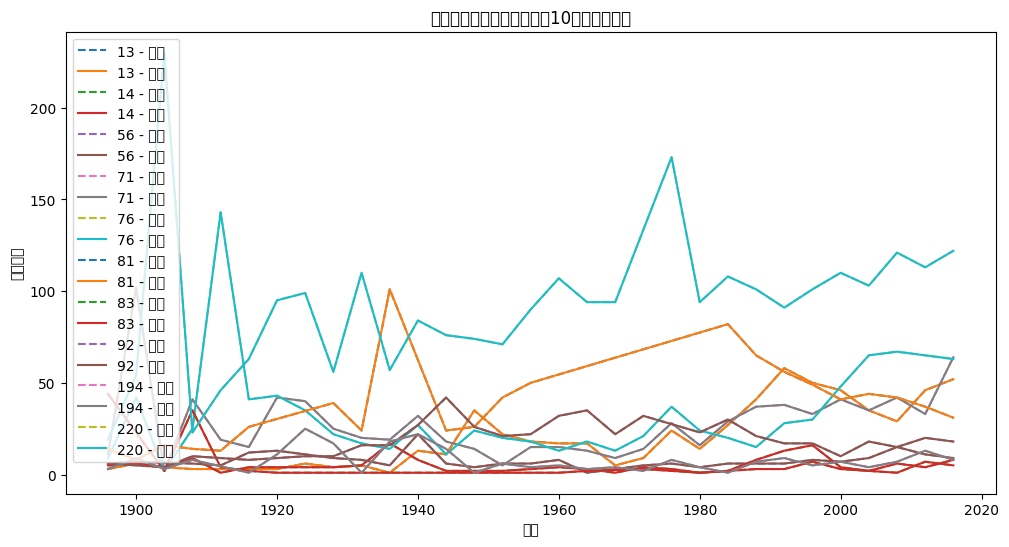

<Figure size 800x600 with 0 Axes>

/SSD_DISK/users/yaoyuxuan/anaconda3/envs/gaussian_splatting/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/SSD_DISK/users/yaoyuxuan/anaconda3/envs/gaussian_splatting/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/SSD_DISK/users/yaoyuxuan/anaconda3/envs/gaussian_splatting/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/SSD_DISK/users/yaoyuxuan/anaconda3/envs/gaussian_splatting/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/SSD_DISK/us

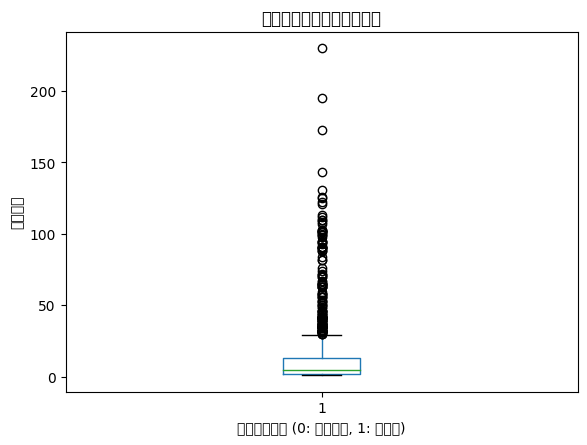


修正后的数据已保存为 `corrected_olympic_data.csv`。


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. 加载数据
# 读取 'data/olympic_medals_with_type.npy'
# 数据结构为 (Sport, Year, NOC)，每一项表示某 NOC 在某年某体育项目中的奖牌数
raw_data = np.load('data/olympic_medals_with_type.npy')  # 三维数组
num_sports, num_years, num_nocs = raw_data.shape



# 2. 数据检查
print("数据样例：")
print(data.head())

# 3. 建立线性回归模型
# 自变量: 是否为东道主 (Host)
X = data[["Host"]]
# 因变量: 奖牌数量 (Medals)
y = data["Medals"]

# 创建并训练模型
model = LinearRegression()
model.fit(X, y)

# 获取回归结果
host_effect = model.coef_[0]  # Host 的回归系数 (β1)
intercept = model.intercept_  # 常数项
print(f"\n回归结果: 奖牌 = {intercept:.2f} + {host_effect:.2f} * Host")
print(f"东道主效应系数 (β1): {host_effect:.2f}")

# 4. 修正奖牌数量
# 修正公式: Corrected_Medals = Medals - β1 * Host
data["Corrected_Medals"] = data["Medals"] - host_effect * data["Host"]

# 显示修正前后对比
print("\n修正前后奖牌数据对比：")
print(data[["Year", "NOC", "Medals", "Corrected_Medals", "Host"]].head())

# 5. 可视化分析
# 修正前后奖牌数量的趋势对比（仅展示前10个国家示例）
plt.figure(figsize=(12, 6))
for noc in data["NOC"].unique()[:10]:  # 示例前10个国家
    subset = data[data["NOC"] == noc]
    plt.plot(subset["Year"], subset["Medals"], label=f"{noc} - 原始", linestyle="--")
    plt.plot(subset["Year"], subset["Corrected_Medals"], label=f"{noc} - 修正", linestyle="-")

plt.title("奖牌数量修正前后对比（前10个国家示例）")
plt.xlabel("年份")
plt.ylabel("奖牌数量")
plt.legend()
plt.show()

# 6. 可视化东道主与非东道主奖牌分布
plt.figure(figsize=(8, 6))
data.boxplot(column="Medals", by="Host", grid=False)
plt.title("东道主与非东道主奖牌分布")
plt.suptitle("")  # 移除默认的 matplotlib 子标题
plt.xlabel("是否为东道主 (0: 非东道主, 1: 东道主)")
plt.ylabel("奖牌总数")
plt.show()

# 7. 保存修正后的数据
data.to_csv("corrected_olympic_data.csv", index=False)
print("\n修正后的数据已保存为 `corrected_olympic_data.csv`。")
